## 6.4 Homework

### 6.4.1 Try to find a way to deal with the noisy data and give your reasoning.

### 6.4.2 Heat capacity of a solid
Debye's theory of solids gives the heat capacity of a solid at temperature $T$ to be

$$C_V = 9V\rho k_B (\frac{T}{\theta_D})^3 \int_0^{\theta_D/T} \frac{x^4e^x}{(e^x-1)^2}dx$$

where $V$ is the volume of the solid, $\rho$ is the density of atoms, $k_B$ is Boltzmann constant, and $\theta$ is the Debye temperature.

- Write a program to calculate $C_V$ for a given value of $T$ for a sample of 1000 $cm^3$ of aluminum, in which the density $\rho$ is 6.022 $\times 10^{28} m^3$ and $\theta_D$ = 428 K. 

- Choose at least one wa to do the integral from the followings
     - Simpson or trapezoid rule by yourself
     - one built-function from scipy

- Plot $C_V$ as a function of temperature from $T$ = 5 K to $T$ = 500 K.

- x is temperature, integral is func of temp
- V = 1000 $cm^3$ => 0.001 $m^3$
- $\rho$ = 6.022 $\times 10^{28} m^3$
- $\theta_D$ = 428 K
- $k_B$ = 1.38064852 × $10^{-23} m^{2} kg s^{-2} K^{-1}$
- $T$ is on x axis, $C_V$ is on y axis

**6.4.1:** I believe the best way to deal with the noisy data is to fit a curve to the portion of the data that's near the point that we want to take the derivative of. Because this point is the part that we want to take a derivative of, this point and the area around it is all that matters. With this method, the $h$ value can be very small like usual and the derivative can arguably still be accurate.

**6.4.2**

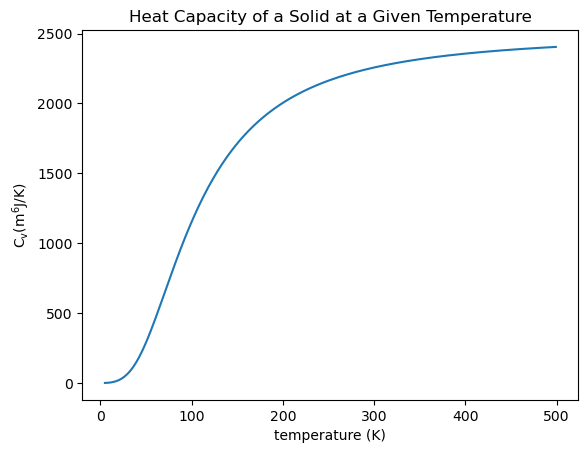

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

def debye(V, p, thet):
    #define variables
    T = np.arange(5, 500)
    T_range = 500-5
    k = 1.38064852e-23
    e = 2.71828
    f = lambda x: ((x**4)*e**x)/(((e**x)-1)**2)
    integ_val = np.empty([T_range], float)
    C = np.empty([T_range], float)
    
    #integration portion of eqn
    for i in range(len(T)):
        integ = integrate.quad(f, 0, thet/(T[i]))
        integ_val[i] = integ[0]
    
    #multiplication portion of eqn
    for j in range(len(T)):
        C[j] = (9*V*p*k*((T[j]/thet)**3)) * integ_val[j]
        
    #plot the graph
    plt.plot(T, C)
    plt.xlabel('temperature (K)')
    plt.ylabel('$\mathregular{C_{v}(m^{6}J/K)}$')
    plt.title('Heat Capacity of a Solid at a Given Temperature')
    plt.show()

debye(0.001, 6.022*(10**28), 428)